In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
data = pd.read_csv('./nyc-rolling-sales-clean-1.csv', sep=';')

In [3]:
data.head()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
0,2400,1552,1930,2,220485,10900
1,2742,1207,1925,2,223372,8100
2,5610,1320,1910,5,362981,19000
3,1758,1537,1910,5,245135,9700
4,1317,1339,1920,4,216477,12800


In [4]:
data.describe()

,Land_sqf,Gross_sqf,Year_built,NBH_level,SALE_PRICE,YEARLY_RENT
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2645.676976,1639.773196,1938.378007,5.374570,287247.257732,18346.735395
std,1353.765596,810.233323,27.953929,2.892423,105082.283757,9435.111314
min,353.000000,450.000000,1901.000000,1.000000,78522.000000,4300.000000
25%,1900.000000,1114.000000,1920.000000,3.000000,216482.500000,10750.000000
50%,2446.000000,1400.000000,1930.000000,5.000000,281208.000000,17300.000000
75%,3000.000000,1960.000000,1950.000000,8.000000,332174.500000,24550.000000
max,14384.000000,5303.000000,2015.000000,10.000000,961748.000000,81400.000000


In [5]:
column_data = data.columns
X = data[column_data[:-2]]
Y = data[column_data[-2:]]

In [6]:
split_ratio = 0.8
training_size = int(X.shape[0] * split_ratio)
x_train = X.iloc[:training_size,:]
x_valid = X.iloc[training_size:,:]
y_train = Y.iloc[:training_size, :]
y_valid = Y.iloc[training_size:,:]
print(f"""{x_train.shape} is x_train shape
{x_valid.shape} is x_valid_shape
{y_train.shape} is y_valid.shape
{y_valid.shape} is y_valid.shape""")

(232, 4) is x_train shape
(59, 4) is x_valid_shape
(232, 2) is y_valid.shape
(59, 2) is y_valid.shape


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 34,178
Trainable params: 34,178
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])

In [10]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=5000)

Train on 232 samples
Epoch 1/5000
232/232 [==============================] - 1s 4ms/sample - loss: 45566642105.3793 - mae: 150135.4375
Epoch 2/5000
232/232 [==============================] - 0s 138us/sample - loss: 44813910722.2069 - mae: 148959.6094
Epoch 3/5000
232/232 [==============================] - 0s 181us/sample - loss: 43899663889.6552 - mae: 147365.5156
Epoch 4/5000
232/232 [==============================] - 0s 159us/sample - loss: 42679240068.4138 - mae: 144895.9531
Epoch 5/5000
232/232 [==============================] - 0s 216us/sample - loss: 41016171131.5862 - mae: 141103.2344
Epoch 6/5000
232/232 [==============================] - 0s 172us/sample - loss: 38642061453.2414 - mae: 135442.4531
Epoch 7/5000
232/232 [==============================] - 0s 185us/sample - loss: 35433019745.1034 - mae: 127879.2422
Epoch 8/5000
232/232 [==============================] - 0s 224us/sample - loss: 31471899824.5517 - mae: 119571.1172
Epoch 9/5000
232/232 [==============================]

232/232 [==============================] - 0s 164us/sample - loss: 1201836217.3793 - mae: 23553.5566
Epoch 72/5000
232/232 [==============================] - 0s 151us/sample - loss: 1195834740.9655 - mae: 23521.5586
Epoch 73/5000
232/232 [==============================] - 0s 134us/sample - loss: 1196409105.6552 - mae: 23547.8691
Epoch 74/5000
232/232 [==============================] - 0s 142us/sample - loss: 1199365305.3793 - mae: 23544.1680
Epoch 75/5000
232/232 [==============================] - 0s 129us/sample - loss: 1203281999.4483 - mae: 23765.5625
Epoch 76/5000
232/232 [==============================] - 0s 134us/sample - loss: 1197985328.5517 - mae: 23602.0039
Epoch 77/5000
232/232 [==============================] - 0s 121us/sample - loss: 1189575181.2414 - mae: 23491.8613
Epoch 78/5000
232/232 [==============================] - 0s 125us/sample - loss: 1186133203.8621 - mae: 23485.0137
Epoch 79/5000
232/232 [==============================] - 0s 125us/sample - loss: 1183419003.58

Epoch 142/5000
232/232 [==============================] - 0s 172us/sample - loss: 1139830898.7586 - mae: 23167.7539
Epoch 143/5000
232/232 [==============================] - 0s 194us/sample - loss: 1132200545.1034 - mae: 23097.3047
Epoch 144/5000
232/232 [==============================] - 0s 241us/sample - loss: 1133880240.5517 - mae: 23108.3828
Epoch 145/5000
232/232 [==============================] - 0s 220us/sample - loss: 1137068826.4828 - mae: 23135.9238
Epoch 146/5000
232/232 [==============================] - 0s 285us/sample - loss: 1135364890.4828 - mae: 23100.5664
Epoch 147/5000
232/232 [==============================] - 0s 310us/sample - loss: 1135893172.9655 - mae: 23168.5918
Epoch 148/5000
232/232 [==============================] - 0s 224us/sample - loss: 1131905703.7241 - mae: 23085.2773
Epoch 149/5000
232/232 [==============================] - 0s 228us/sample - loss: 1133680498.7586 - mae: 23098.3828
Epoch 150/5000
232/232 [==============================] - 0s 241us/sampl

232/232 [==============================] - 0s 108us/sample - loss: 1119285548.1379 - mae: 22964.2168
Epoch 213/5000
232/232 [==============================] - 0s 151us/sample - loss: 1129961346.2069 - mae: 23062.7324
Epoch 214/5000
232/232 [==============================] - 0s 125us/sample - loss: 1108451784.8276 - mae: 22855.7871
Epoch 215/5000
232/232 [==============================] - ETA: 0s - loss: 932552448.0000 - mae: 20574.062 - 0s 108us/sample - loss: 1113353622.0690 - mae: 22889.8379
Epoch 216/5000
232/232 [==============================] - 0s 134us/sample - loss: 1113055885.2414 - mae: 22859.9395
Epoch 217/5000
232/232 [==============================] - 0s 116us/sample - loss: 1110208666.4828 - mae: 22830.5820
Epoch 218/5000
232/232 [==============================] - 0s 108us/sample - loss: 1118076729.3793 - mae: 22937.1309
Epoch 219/5000
232/232 [==============================] - 0s 116us/sample - loss: 1116139272.8276 - mae: 23004.9434
Epoch 220/5000
232/232 [=============

Epoch 282/5000
232/232 [==============================] - 0s 99us/sample - loss: 1102446373.5172 - mae: 22826.9707
Epoch 283/5000
232/232 [==============================] - 0s 99us/sample - loss: 1097245709.2414 - mae: 22665.4395
Epoch 284/5000
232/232 [==============================] - 0s 91us/sample - loss: 1089818910.8966 - mae: 22632.4590
Epoch 285/5000
232/232 [==============================] - 0s 116us/sample - loss: 1092906718.8966 - mae: 22660.7422
Epoch 286/5000
232/232 [==============================] - 0s 99us/sample - loss: 1087990104.2759 - mae: 22607.6113
Epoch 287/5000
232/232 [==============================] - 0s 99us/sample - loss: 1086649900.1379 - mae: 22584.0547
Epoch 288/5000
232/232 [==============================] - 0s 95us/sample - loss: 1091137536.0000 - mae: 22665.9121
Epoch 289/5000
232/232 [==============================] - 0s 99us/sample - loss: 1101943931.5862 - mae: 22744.3008
Epoch 290/5000
232/232 [==============================] - 0s 99us/sample - loss

232/232 [==============================] - 0s 103us/sample - loss: 1064291705.3793 - mae: 22372.2500
Epoch 353/5000
232/232 [==============================] - 0s 103us/sample - loss: 1067807066.4828 - mae: 22392.9707
Epoch 354/5000
232/232 [==============================] - 0s 99us/sample - loss: 1068703232.0000 - mae: 22396.9551
Epoch 355/5000
232/232 [==============================] - 0s 95us/sample - loss: 1094034893.2414 - mae: 22675.6406
Epoch 356/5000
232/232 [==============================] - 0s 99us/sample - loss: 1065928706.2069 - mae: 22361.8418
Epoch 357/5000
232/232 [==============================] - 0s 99us/sample - loss: 1062912873.9310 - mae: 22339.2520
Epoch 358/5000
232/232 [==============================] - 0s 103us/sample - loss: 1071891383.1724 - mae: 22416.1074
Epoch 359/5000
232/232 [==============================] - 0s 95us/sample - loss: 1062379440.5517 - mae: 22335.0234
Epoch 360/5000
232/232 [==============================] - 0s 116us/sample - loss: 1064534221

232/232 [==============================] - 0s 103us/sample - loss: 1039233337.3793 - mae: 22094.4023
Epoch 424/5000
232/232 [==============================] - 0s 103us/sample - loss: 1031260067.3103 - mae: 21984.1602
Epoch 425/5000
232/232 [==============================] - 0s 99us/sample - loss: 1032909446.6207 - mae: 21985.6699
Epoch 426/5000
232/232 [==============================] - 0s 99us/sample - loss: 1032142203.5862 - mae: 22013.7578
Epoch 427/5000
232/232 [==============================] - 0s 95us/sample - loss: 1031691961.3793 - mae: 21997.7090
Epoch 428/5000
232/232 [==============================] - 0s 99us/sample - loss: 1031107478.0690 - mae: 21981.6250
Epoch 429/5000
232/232 [==============================] - 0s 99us/sample - loss: 1035987970.2069 - mae: 22052.6875
Epoch 430/5000
232/232 [==============================] - 0s 95us/sample - loss: 1028944454.6207 - mae: 21971.7734
Epoch 431/5000
232/232 [==============================] - 0s 82us/sample - loss: 1032802270.8

232/232 [==============================] - 0s 95us/sample - loss: 994518095.4483 - mae: 21567.7793
Epoch 495/5000
232/232 [==============================] - 0s 95us/sample - loss: 987736924.6897 - mae: 21505.6406
Epoch 496/5000
232/232 [==============================] - 0s 147us/sample - loss: 993598689.1034 - mae: 21634.1816
Epoch 497/5000
232/232 [==============================] - 0s 99us/sample - loss: 992156717.2414 - mae: 21562.7227
Epoch 498/5000
232/232 [==============================] - 0s 78us/sample - loss: 991421846.0690 - mae: 21514.1309
Epoch 499/5000
232/232 [==============================] - 0s 86us/sample - loss: 989601169.6552 - mae: 21557.0195
Epoch 500/5000
232/232 [==============================] - 0s 91us/sample - loss: 987351777.1034 - mae: 21479.5391
Epoch 501/5000
232/232 [==============================] - 0s 86us/sample - loss: 987964398.3448 - mae: 21512.3711
Epoch 502/5000
232/232 [==============================] - 0s 91us/sample - loss: 988618438.6207 - mae:

232/232 [==============================] - 0s 112us/sample - loss: 939946107.5862 - mae: 20973.0234
Epoch 566/5000
232/232 [==============================] - 0s 125us/sample - loss: 935016152.2759 - mae: 20959.1914
Epoch 567/5000
232/232 [==============================] - 0s 112us/sample - loss: 939674213.5172 - mae: 21045.2754
Epoch 568/5000
232/232 [==============================] - 0s 129us/sample - loss: 945529564.6897 - mae: 21067.4141
Epoch 569/5000
232/232 [==============================] - 0s 138us/sample - loss: 938432386.2069 - mae: 20927.5684
Epoch 570/5000
232/232 [==============================] - 0s 164us/sample - loss: 945026109.7931 - mae: 21044.9121
Epoch 571/5000
232/232 [==============================] - 0s 172us/sample - loss: 947822516.9655 - mae: 21106.2773
Epoch 572/5000
232/232 [==============================] - 0s 129us/sample - loss: 969315235.3103 - mae: 21328.9844
Epoch 573/5000
232/232 [==============================] - 0s 121us/sample - loss: 934966775.172

232/232 [==============================] - 0s 86us/sample - loss: 868796473.3793 - mae: 20261.9531
Epoch 637/5000
232/232 [==============================] - 0s 78us/sample - loss: 864956446.8966 - mae: 20126.8770
Epoch 638/5000
232/232 [==============================] - 0s 82us/sample - loss: 862646931.8621 - mae: 20129.6660
Epoch 639/5000
232/232 [==============================] - 0s 86us/sample - loss: 862653150.8966 - mae: 20139.4199
Epoch 640/5000
232/232 [==============================] - 0s 95us/sample - loss: 867526541.2414 - mae: 20173.3750
Epoch 641/5000
232/232 [==============================] - 0s 108us/sample - loss: 860381881.3793 - mae: 20043.2441
Epoch 642/5000
232/232 [==============================] - 0s 86us/sample - loss: 857225238.0690 - mae: 20043.9141
Epoch 643/5000
232/232 [==============================] - 0s 86us/sample - loss: 853931791.4483 - mae: 20013.1191
Epoch 644/5000
232/232 [==============================] - 0s 95us/sample - loss: 863950856.8276 - mae:

232/232 [==============================] - 0s 164us/sample - loss: 768220998.6207 - mae: 18999.6211
Epoch 708/5000
232/232 [==============================] - 0s 190us/sample - loss: 762285049.3793 - mae: 19000.0234
Epoch 709/5000
232/232 [==============================] - 0s 129us/sample - loss: 761432737.1034 - mae: 18859.2773
Epoch 710/5000
232/232 [==============================] - 0s 108us/sample - loss: 759255940.4138 - mae: 18889.0469
Epoch 711/5000
232/232 [==============================] - 0s 129us/sample - loss: 755655726.3448 - mae: 18891.6172
Epoch 712/5000
232/232 [==============================] - 0s 134us/sample - loss: 752417174.0690 - mae: 18830.3594
Epoch 713/5000
232/232 [==============================] - 0s 116us/sample - loss: 753284687.4483 - mae: 18805.9297
Epoch 714/5000
232/232 [==============================] - 0s 129us/sample - loss: 752066537.9310 - mae: 18851.1309
Epoch 715/5000
232/232 [==============================] - 0s 142us/sample - loss: 759182437.517

232/232 [==============================] - 0s 82us/sample - loss: 619383495.7241 - mae: 17195.8555
Epoch 779/5000
232/232 [==============================] - 0s 91us/sample - loss: 604224790.0690 - mae: 17003.2227
Epoch 780/5000
232/232 [==============================] - 0s 78us/sample - loss: 609686565.5172 - mae: 16970.2910
Epoch 781/5000
232/232 [==============================] - 0s 91us/sample - loss: 601334533.7931 - mae: 16928.2168
Epoch 782/5000
232/232 [==============================] - 0s 95us/sample - loss: 602115059.8621 - mae: 16929.9570
Epoch 783/5000
232/232 [==============================] - 0s 86us/sample - loss: 594500232.8276 - mae: 16860.9961
Epoch 784/5000
232/232 [==============================] - 0s 86us/sample - loss: 591434846.8966 - mae: 16799.0566
Epoch 785/5000
232/232 [==============================] - 0s 91us/sample - loss: 594065955.3103 - mae: 16855.3418
Epoch 786/5000
232/232 [==============================] - 0s 82us/sample - loss: 586310104.2759 - mae: 

232/232 [==============================] - 0s 86us/sample - loss: 405781918.8966 - mae: 13859.6133
Epoch 850/5000
232/232 [==============================] - 0s 86us/sample - loss: 399990105.3793 - mae: 13823.1992
Epoch 851/5000
232/232 [==============================] - 0s 86us/sample - loss: 408356274.7586 - mae: 13908.5615
Epoch 852/5000
232/232 [==============================] - 0s 86us/sample - loss: 402732843.0345 - mae: 13795.1055
Epoch 853/5000
232/232 [==============================] - 0s 125us/sample - loss: 417840280.2759 - mae: 14055.1484
Epoch 854/5000
232/232 [==============================] - 0s 99us/sample - loss: 381874552.2759 - mae: 13523.7402
Epoch 855/5000
232/232 [==============================] - 0s 116us/sample - loss: 385458280.2759 - mae: 13535.5518
Epoch 856/5000
232/232 [==============================] - 0s 151us/sample - loss: 384482075.5862 - mae: 13562.7148
Epoch 857/5000
232/232 [==============================] - 0s 185us/sample - loss: 384164290.2069 - m

232/232 [==============================] - 0s 86us/sample - loss: 206829569.1034 - mae: 9750.3418
Epoch 921/5000
232/232 [==============================] - 0s 86us/sample - loss: 223696221.7931 - mae: 10187.3467
Epoch 922/5000
232/232 [==============================] - 0s 86us/sample - loss: 216733482.4828 - mae: 9865.0010
Epoch 923/5000
232/232 [==============================] - 0s 82us/sample - loss: 211460785.6552 - mae: 9854.4023
Epoch 924/5000
232/232 [==============================] - 0s 112us/sample - loss: 200319360.5517 - mae: 9589.3193
Epoch 925/5000
232/232 [==============================] - 0s 159us/sample - loss: 218626824.8276 - mae: 9917.8457
Epoch 926/5000
232/232 [==============================] - 0s 112us/sample - loss: 200045435.0345 - mae: 9562.6650
Epoch 927/5000
232/232 [==============================] - 0s 103us/sample - loss: 193251824.0000 - mae: 9389.9932
Epoch 928/5000
232/232 [==============================] - 0s 103us/sample - loss: 192929985.1034 - mae: 93

Epoch 992/5000
232/232 [==============================] - 0s 103us/sample - loss: 141617872.5517 - mae: 8151.5347
Epoch 993/5000
232/232 [==============================] - 0s 86us/sample - loss: 147209384.8276 - mae: 8242.2510
Epoch 994/5000
232/232 [==============================] - 0s 82us/sample - loss: 150576744.2759 - mae: 8304.6221
Epoch 995/5000
232/232 [==============================] - 0s 86us/sample - loss: 143020266.4828 - mae: 8202.6416
Epoch 996/5000
232/232 [==============================] - 0s 95us/sample - loss: 147717066.4828 - mae: 8280.6162
Epoch 997/5000
232/232 [==============================] - 0s 91us/sample - loss: 138716450.2069 - mae: 8064.3066
Epoch 998/5000
232/232 [==============================] - 0s 78us/sample - loss: 136117577.9310 - mae: 8005.7847
Epoch 999/5000
232/232 [==============================] - 0s 86us/sample - loss: 137759192.2759 - mae: 8038.5596
Epoch 1000/5000
232/232 [==============================] - 0s 86us/sample - loss: 145752141.241

232/232 [==============================] - 0s 108us/sample - loss: 139015320.1379 - mae: 8037.4614
Epoch 1064/5000
232/232 [==============================] - 0s 99us/sample - loss: 137859161.6552 - mae: 8005.4097
Epoch 1065/5000
232/232 [==============================] - 0s 86us/sample - loss: 149713727.1724 - mae: 8198.5498
Epoch 1066/5000
232/232 [==============================] - 0s 86us/sample - loss: 141656945.6552 - mae: 8054.1777
Epoch 1067/5000
232/232 [==============================] - 0s 82us/sample - loss: 137622580.4138 - mae: 8030.5830
Epoch 1068/5000
232/232 [==============================] - 0s 112us/sample - loss: 130867978.4828 - mae: 7827.8735
Epoch 1069/5000
232/232 [==============================] - 0s 82us/sample - loss: 132118995.8621 - mae: 7885.0967
Epoch 1070/5000
232/232 [==============================] - 0s 95us/sample - loss: 133184745.3793 - mae: 7930.6426
Epoch 1071/5000
232/232 [==============================] - 0s 103us/sample - loss: 135756748.1379 - ma

232/232 [==============================] - 0s 99us/sample - loss: 134842446.0690 - mae: 7890.4058
Epoch 1135/5000
232/232 [==============================] - 0s 108us/sample - loss: 137246817.1034 - mae: 7981.9136
Epoch 1136/5000
232/232 [==============================] - 0s 112us/sample - loss: 127760196.4138 - mae: 7768.6973
Epoch 1137/5000
232/232 [==============================] - 0s 103us/sample - loss: 130589678.8966 - mae: 7757.0195
Epoch 1138/5000
232/232 [==============================] - 0s 129us/sample - loss: 129494562.7586 - mae: 7784.0542
Epoch 1139/5000
232/232 [==============================] - 0s 185us/sample - loss: 129550926.3448 - mae: 7814.5103
Epoch 1140/5000
232/232 [==============================] - 0s 203us/sample - loss: 132861426.7586 - mae: 7867.6958
Epoch 1141/5000
232/232 [==============================] - 0s 142us/sample - loss: 141057334.6207 - mae: 8183.9512
Epoch 1142/5000
232/232 [==============================] - 0s 138us/sample - loss: 136486327.1724

232/232 [==============================] - 0s 112us/sample - loss: 138885128.8276 - mae: 8071.5366
Epoch 1206/5000
232/232 [==============================] - 0s 134us/sample - loss: 148226529.3793 - mae: 8181.9980
Epoch 1207/5000
232/232 [==============================] - 0s 142us/sample - loss: 139523596.1379 - mae: 7988.3638
Epoch 1208/5000
232/232 [==============================] - 0s 121us/sample - loss: 128931588.4138 - mae: 7753.9673
Epoch 1209/5000
232/232 [==============================] - 0s 121us/sample - loss: 126951774.3448 - mae: 7703.9526
Epoch 1210/5000
232/232 [==============================] - 0s 99us/sample - loss: 136232676.4138 - mae: 7939.1709
Epoch 1211/5000
232/232 [==============================] - 0s 108us/sample - loss: 132361810.7586 - mae: 7853.4668
Epoch 1212/5000
232/232 [==============================] - 0s 194us/sample - loss: 128988733.7931 - mae: 7767.1675
Epoch 1213/5000
232/232 [==============================] - 0s 164us/sample - loss: 128754439.1724

232/232 [==============================] - 0s 91us/sample - loss: 128555239.7241 - mae: 7740.3750
Epoch 1277/5000
232/232 [==============================] - 0s 91us/sample - loss: 142371344.5517 - mae: 8111.4155
Epoch 1278/5000
232/232 [==============================] - 0s 86us/sample - loss: 131571205.7931 - mae: 7821.3120
Epoch 1279/5000
232/232 [==============================] - 0s 108us/sample - loss: 127097863.7241 - mae: 7697.2974
Epoch 1280/5000
232/232 [==============================] - 0s 91us/sample - loss: 143121988.9655 - mae: 8156.3950
Epoch 1281/5000
232/232 [==============================] - 0s 91us/sample - loss: 168560848.8276 - mae: 8694.6582
Epoch 1282/5000
232/232 [==============================] - 0s 91us/sample - loss: 148127383.1724 - mae: 8258.8916
Epoch 1283/5000
232/232 [==============================] - 0s 82us/sample - loss: 165128713.3793 - mae: 8371.0879
Epoch 1284/5000
232/232 [==============================] - 0s 95us/sample - loss: 143166626.2069 - mae:

232/232 [==============================] - 0s 172us/sample - loss: 128160001.6552 - mae: 7706.4248
Epoch 1348/5000
232/232 [==============================] - 0s 228us/sample - loss: 129179766.0690 - mae: 7784.1714
Epoch 1349/5000
232/232 [==============================] - 0s 112us/sample - loss: 135824041.3793 - mae: 7837.0405
Epoch 1350/5000
232/232 [==============================] - 0s 121us/sample - loss: 133892475.5862 - mae: 7928.2808
Epoch 1351/5000
232/232 [==============================] - 0s 121us/sample - loss: 141310934.0690 - mae: 8027.1880
Epoch 1352/5000
232/232 [==============================] - 0s 112us/sample - loss: 148148872.8276 - mae: 8113.4043
Epoch 1353/5000
232/232 [==============================] - 0s 112us/sample - loss: 135818456.2759 - mae: 7942.8652
Epoch 1354/5000
232/232 [==============================] - 0s 121us/sample - loss: 129842571.5862 - mae: 7782.3228
Epoch 1355/5000
232/232 [==============================] - 0s 125us/sample - loss: 127363066.827

232/232 [==============================] - 0s 108us/sample - loss: 128335673.3793 - mae: 7697.2295
Epoch 1419/5000
232/232 [==============================] - 0s 138us/sample - loss: 168894443.0345 - mae: 8664.4834
Epoch 1420/5000
232/232 [==============================] - 0s 185us/sample - loss: 133915164.6897 - mae: 7813.6426
Epoch 1421/5000
232/232 [==============================] - 0s 147us/sample - loss: 130729372.9655 - mae: 7829.2739
Epoch 1422/5000
232/232 [==============================] - 0s 151us/sample - loss: 139917988.9655 - mae: 8067.0039
Epoch 1423/5000
232/232 [==============================] - 0s 138us/sample - loss: 140911649.6552 - mae: 7941.8799
Epoch 1424/5000
232/232 [==============================] - 0s 138us/sample - loss: 137617687.7241 - mae: 7959.6724
Epoch 1425/5000
232/232 [==============================] - 0s 138us/sample - loss: 133033588.6897 - mae: 7710.1934
Epoch 1426/5000
232/232 [==============================] - 0s 211us/sample - loss: 131587110.069

232/232 [==============================] - 0s 142us/sample - loss: 134557241.3793 - mae: 7768.6914
Epoch 1490/5000
232/232 [==============================] - 0s 134us/sample - loss: 128885796.9655 - mae: 7718.8691
Epoch 1491/5000
232/232 [==============================] - 0s 121us/sample - loss: 128291521.1034 - mae: 7728.5635
Epoch 1492/5000
232/232 [==============================] - 0s 138us/sample - loss: 128821713.1034 - mae: 7784.2729
Epoch 1493/5000
232/232 [==============================] - 0s 134us/sample - loss: 127759517.7931 - mae: 7727.8081
Epoch 1494/5000
232/232 [==============================] - 0s 151us/sample - loss: 128832913.6552 - mae: 7745.8843
Epoch 1495/5000
232/232 [==============================] - 0s 116us/sample - loss: 132881961.9310 - mae: 7875.2080
Epoch 1496/5000
232/232 [==============================] - 0s 112us/sample - loss: 128254910.8966 - mae: 7802.3096
Epoch 1497/5000
232/232 [==============================] - 0s 91us/sample - loss: 131913895.1724

232/232 [==============================] - 0s 103us/sample - loss: 126952530.2069 - mae: 7611.6152
Epoch 1561/5000
232/232 [==============================] - 0s 108us/sample - loss: 123353221.5172 - mae: 7613.6929
Epoch 1562/5000
232/232 [==============================] - 0s 108us/sample - loss: 128033989.2414 - mae: 7742.9702
Epoch 1563/5000
232/232 [==============================] - 0s 138us/sample - loss: 126790908.6897 - mae: 7653.6890
Epoch 1564/5000
232/232 [==============================] - 0s 147us/sample - loss: 123985791.4483 - mae: 7590.8052
Epoch 1565/5000
232/232 [==============================] - 0s 129us/sample - loss: 126047824.5517 - mae: 7586.5684
Epoch 1566/5000
232/232 [==============================] - 0s 95us/sample - loss: 131594954.2069 - mae: 7830.0303
Epoch 1567/5000
232/232 [==============================] - 0s 142us/sample - loss: 127758779.0345 - mae: 7651.4580
Epoch 1568/5000
232/232 [==============================] - 0s 177us/sample - loss: 128734907.5862

232/232 [==============================] - 0s 138us/sample - loss: 146686822.0690 - mae: 8270.7646
Epoch 1632/5000
232/232 [==============================] - 0s 147us/sample - loss: 126846084.9655 - mae: 7584.8022
Epoch 1633/5000
232/232 [==============================] - 0s 121us/sample - loss: 136332172.1379 - mae: 7832.9595
Epoch 1634/5000
232/232 [==============================] - 0s 112us/sample - loss: 130060332.6897 - mae: 7726.4731
Epoch 1635/5000
232/232 [==============================] - 0s 172us/sample - loss: 126525736.2759 - mae: 7642.6055
Epoch 1636/5000
232/232 [==============================] - 0s 190us/sample - loss: 145155079.7241 - mae: 8186.6089
Epoch 1637/5000
232/232 [==============================] - 0s 237us/sample - loss: 135040936.1379 - mae: 7872.9131
Epoch 1638/5000
232/232 [==============================] - 0s 211us/sample - loss: 135778518.0690 - mae: 7994.2085
Epoch 1639/5000
232/232 [==============================] - 0s 185us/sample - loss: 140196916.413

232/232 [==============================] - 0s 138us/sample - loss: 137262982.8966 - mae: 7997.8218
Epoch 1703/5000
232/232 [==============================] - 0s 121us/sample - loss: 125445217.6552 - mae: 7684.1626
Epoch 1704/5000
232/232 [==============================] - 0s 138us/sample - loss: 125610277.5172 - mae: 7628.9185
Epoch 1705/5000
232/232 [==============================] - 0s 155us/sample - loss: 129394968.8276 - mae: 7648.6128
Epoch 1706/5000
232/232 [==============================] - 0s 112us/sample - loss: 125922983.1724 - mae: 7662.8340
Epoch 1707/5000
232/232 [==============================] - 0s 121us/sample - loss: 127399675.3103 - mae: 7657.2334
Epoch 1708/5000
232/232 [==============================] - 0s 125us/sample - loss: 124345722.4828 - mae: 7559.4136
Epoch 1709/5000
232/232 [==============================] - 0s 121us/sample - loss: 126899492.4138 - mae: 7634.4043
Epoch 1710/5000
232/232 [==============================] - 0s 280us/sample - loss: 129593833.379

Epoch 1773/5000
232/232 [==============================] - 0s 142us/sample - loss: 122190529.1034 - mae: 7527.0073
Epoch 1774/5000
232/232 [==============================] - 0s 147us/sample - loss: 123023725.2414 - mae: 7586.8662
Epoch 1775/5000
232/232 [==============================] - 0s 125us/sample - loss: 124887070.0690 - mae: 7576.3027
Epoch 1776/5000
232/232 [==============================] - 0s 142us/sample - loss: 129191996.6897 - mae: 7700.0840
Epoch 1777/5000
232/232 [==============================] - 0s 138us/sample - loss: 136842464.5517 - mae: 7882.5361
Epoch 1778/5000
232/232 [==============================] - 0s 112us/sample - loss: 136251970.4828 - mae: 7957.1890
Epoch 1779/5000
232/232 [==============================] - 0s 103us/sample - loss: 127672684.1379 - mae: 7602.4995
Epoch 1780/5000
232/232 [==============================] - 0s 121us/sample - loss: 134985672.0000 - mae: 7735.5762
Epoch 1781/5000
232/232 [==============================] - 0s 159us/sample - los

232/232 [==============================] - 0s 125us/sample - loss: 132109090.2069 - mae: 7781.7456
Epoch 1845/5000
232/232 [==============================] - 0s 138us/sample - loss: 126519924.4138 - mae: 7561.7700
Epoch 1846/5000
232/232 [==============================] - 0s 142us/sample - loss: 133831228.1379 - mae: 7881.0039
Epoch 1847/5000
232/232 [==============================] - 0s 121us/sample - loss: 137686514.7586 - mae: 7921.0840
Epoch 1848/5000
232/232 [==============================] - 0s 99us/sample - loss: 129276023.1724 - mae: 7677.5386
Epoch 1849/5000
232/232 [==============================] - 0s 116us/sample - loss: 128896058.7586 - mae: 7584.7148
Epoch 1850/5000
232/232 [==============================] - 0s 134us/sample - loss: 138819142.0690 - mae: 7897.5059
Epoch 1851/5000
232/232 [==============================] - 0s 147us/sample - loss: 123771150.6207 - mae: 7562.4604
Epoch 1852/5000
232/232 [==============================] - 0s 125us/sample - loss: 126111901.2414

232/232 [==============================] - 0s 129us/sample - loss: 124330340.9655 - mae: 7644.9058
Epoch 1916/5000
232/232 [==============================] - 0s 147us/sample - loss: 124256271.4483 - mae: 7578.1792
Epoch 1917/5000
232/232 [==============================] - 0s 134us/sample - loss: 138360730.4828 - mae: 7848.3843
Epoch 1918/5000
232/232 [==============================] - 0s 129us/sample - loss: 158627093.5172 - mae: 8363.0146
Epoch 1919/5000
232/232 [==============================] - 0s 121us/sample - loss: 133152779.4483 - mae: 7838.3184
Epoch 1920/5000
232/232 [==============================] - 0s 125us/sample - loss: 133686874.4828 - mae: 7727.4980
Epoch 1921/5000
232/232 [==============================] - 0s 147us/sample - loss: 129790914.2069 - mae: 7726.7207
Epoch 1922/5000
232/232 [==============================] - 0s 125us/sample - loss: 128282507.0345 - mae: 7679.9546
Epoch 1923/5000
232/232 [==============================] - 0s 121us/sample - loss: 141026523.586

232/232 [==============================] - 0s 112us/sample - loss: 144476211.3103 - mae: 7953.3867
Epoch 1987/5000
232/232 [==============================] - 0s 129us/sample - loss: 141762794.4828 - mae: 7977.3169
Epoch 1988/5000
232/232 [==============================] - 0s 125us/sample - loss: 138959611.0345 - mae: 7853.8657
Epoch 1989/5000
232/232 [==============================] - 0s 121us/sample - loss: 127617582.8966 - mae: 7615.5103
Epoch 1990/5000
232/232 [==============================] - 0s 99us/sample - loss: 135435779.0345 - mae: 7787.5898
Epoch 1991/5000
232/232 [==============================] - 0s 116us/sample - loss: 125064116.1379 - mae: 7587.9336
Epoch 1992/5000
232/232 [==============================] - 0s 108us/sample - loss: 130390761.3793 - mae: 7690.2539
Epoch 1993/5000
232/232 [==============================] - 0s 121us/sample - loss: 120309943.4483 - mae: 7469.1270
Epoch 1994/5000
232/232 [==============================] - 0s 112us/sample - loss: 124374155.5862

Epoch 2057/5000
232/232 [==============================] - 0s 116us/sample - loss: 126860717.2414 - mae: 7556.1196
Epoch 2058/5000
232/232 [==============================] - 0s 129us/sample - loss: 122760457.6552 - mae: 7550.8970
Epoch 2059/5000
232/232 [==============================] - 0s 103us/sample - loss: 126018957.7931 - mae: 7594.8452
Epoch 2060/5000
232/232 [==============================] - 0s 112us/sample - loss: 132761831.7241 - mae: 7803.5879
Epoch 2061/5000
232/232 [==============================] - 0s 121us/sample - loss: 125768296.8276 - mae: 7623.8276
Epoch 2062/5000
232/232 [==============================] - 0s 116us/sample - loss: 126107384.8276 - mae: 7653.8818
Epoch 2063/5000
232/232 [==============================] - 0s 108us/sample - loss: 125800702.3448 - mae: 7668.5635
Epoch 2064/5000
232/232 [==============================] - 0s 112us/sample - loss: 123194649.3793 - mae: 7561.5000
Epoch 2065/5000
232/232 [==============================] - 0s 116us/sample - los

232/232 [==============================] - 0s 121us/sample - loss: 122187703.1724 - mae: 7524.8848
Epoch 2129/5000
232/232 [==============================] - 0s 159us/sample - loss: 130590098.2069 - mae: 7744.0864
Epoch 2130/5000
232/232 [==============================] - 0s 151us/sample - loss: 134633814.0690 - mae: 7861.2344
Epoch 2131/5000
232/232 [==============================] - 0s 112us/sample - loss: 130912190.8966 - mae: 7645.9214
Epoch 2132/5000
232/232 [==============================] - 0s 108us/sample - loss: 128367657.3793 - mae: 7697.5464
Epoch 2133/5000
232/232 [==============================] - 0s 108us/sample - loss: 123631705.2414 - mae: 7573.9214
Epoch 2134/5000
232/232 [==============================] - 0s 125us/sample - loss: 124448263.1724 - mae: 7549.2261
Epoch 2135/5000
232/232 [==============================] - 0s 112us/sample - loss: 122176981.7931 - mae: 7531.8921
Epoch 2136/5000
232/232 [==============================] - 0s 129us/sample - loss: 124505910.620

232/232 [==============================] - 0s 112us/sample - loss: 121380745.9310 - mae: 7490.1597
Epoch 2200/5000
232/232 [==============================] - 0s 134us/sample - loss: 137143651.8621 - mae: 7788.8247
Epoch 2201/5000
232/232 [==============================] - 0s 142us/sample - loss: 138633247.4483 - mae: 8009.9492
Epoch 2202/5000
232/232 [==============================] - 0s 121us/sample - loss: 136278936.2759 - mae: 7827.0630
Epoch 2203/5000
232/232 [==============================] - 0s 116us/sample - loss: 130348828.1379 - mae: 7684.9761
Epoch 2204/5000
232/232 [==============================] - 0s 103us/sample - loss: 146750212.9655 - mae: 8287.7324
Epoch 2205/5000
232/232 [==============================] - 0s 108us/sample - loss: 144984417.9310 - mae: 8140.2988
Epoch 2206/5000
232/232 [==============================] - 0s 125us/sample - loss: 160846272.0000 - mae: 8418.1709
Epoch 2207/5000
232/232 [==============================] - 0s 116us/sample - loss: 143118084.137

232/232 [==============================] - 0s 121us/sample - loss: 125227758.3448 - mae: 7578.2871
Epoch 2271/5000
232/232 [==============================] - 0s 134us/sample - loss: 138700659.8621 - mae: 7787.2466
Epoch 2272/5000
232/232 [==============================] - 0s 134us/sample - loss: 131888009.9310 - mae: 7787.1523
Epoch 2273/5000
232/232 [==============================] - 0s 108us/sample - loss: 156893401.3793 - mae: 8235.6182
Epoch 2274/5000
232/232 [==============================] - 0s 108us/sample - loss: 125817370.4828 - mae: 7568.4336
Epoch 2275/5000
232/232 [==============================] - 0s 125us/sample - loss: 129166490.4828 - mae: 7585.1011
Epoch 2276/5000
232/232 [==============================] - 0s 125us/sample - loss: 126310796.1379 - mae: 7663.9092
Epoch 2277/5000
232/232 [==============================] - 0s 116us/sample - loss: 121004444.9655 - mae: 7499.0981
Epoch 2278/5000
232/232 [==============================] - 0s 125us/sample - loss: 122906075.586

232/232 [==============================] - 0s 116us/sample - loss: 157755123.8621 - mae: 8216.8574
Epoch 2342/5000
232/232 [==============================] - 0s 125us/sample - loss: 123898331.5862 - mae: 7581.1436
Epoch 2343/5000
232/232 [==============================] - 0s 134us/sample - loss: 125763568.5517 - mae: 7661.0771
Epoch 2344/5000
232/232 [==============================] - 0s 125us/sample - loss: 126184194.2069 - mae: 7611.8340
Epoch 2345/5000
232/232 [==============================] - 0s 108us/sample - loss: 126634161.1034 - mae: 7598.2231
Epoch 2346/5000
232/232 [==============================] - 0s 116us/sample - loss: 136572425.3793 - mae: 7801.4097
Epoch 2347/5000
232/232 [==============================] - 0s 112us/sample - loss: 138545755.3103 - mae: 8002.1411
Epoch 2348/5000
232/232 [==============================] - 0s 112us/sample - loss: 127266768.0000 - mae: 7571.6616
Epoch 2349/5000
232/232 [==============================] - 0s 108us/sample - loss: 123555075.586

232/232 [==============================] - 0s 129us/sample - loss: 138890609.1034 - mae: 7919.7549
Epoch 2413/5000
232/232 [==============================] - 0s 121us/sample - loss: 153560179.8621 - mae: 8326.6279
Epoch 2414/5000
232/232 [==============================] - 0s 134us/sample - loss: 141612214.0690 - mae: 7833.7256
Epoch 2415/5000
232/232 [==============================] - 0s 108us/sample - loss: 162963819.5862 - mae: 8493.4180
Epoch 2416/5000
232/232 [==============================] - 0s 116us/sample - loss: 130624653.2414 - mae: 7768.5640
Epoch 2417/5000
232/232 [==============================] - 0s 125us/sample - loss: 119320812.8276 - mae: 7428.0083
Epoch 2418/5000
232/232 [==============================] - 0s 99us/sample - loss: 124245692.6897 - mae: 7629.5117
Epoch 2419/5000
232/232 [==============================] - 0s 112us/sample - loss: 123765305.1034 - mae: 7559.1816
Epoch 2420/5000
232/232 [==============================] - 0s 108us/sample - loss: 121391314.2069

232/232 [==============================] - 0s 134us/sample - loss: 129978476.6897 - mae: 7670.5801
Epoch 2484/5000
232/232 [==============================] - 0s 147us/sample - loss: 136982478.8966 - mae: 7903.0356
Epoch 2485/5000
232/232 [==============================] - 0s 159us/sample - loss: 122197432.8276 - mae: 7499.8755
Epoch 2486/5000
232/232 [==============================] - 0s 121us/sample - loss: 120404141.7931 - mae: 7423.4644
Epoch 2487/5000
232/232 [==============================] - 0s 142us/sample - loss: 120454547.8621 - mae: 7433.3320
Epoch 2488/5000
232/232 [==============================] - 0s 116us/sample - loss: 124310412.1379 - mae: 7502.1758
Epoch 2489/5000
232/232 [==============================] - 0s 108us/sample - loss: 129243860.9655 - mae: 7691.6626
Epoch 2490/5000
232/232 [==============================] - 0s 138us/sample - loss: 133022097.1034 - mae: 7859.7612
Epoch 2491/5000
232/232 [==============================] - 0s 121us/sample - loss: 143661142.069

232/232 [==============================] - 0s 125us/sample - loss: 124281904.5517 - mae: 7513.0098
Epoch 2555/5000
232/232 [==============================] - 0s 129us/sample - loss: 124205203.8621 - mae: 7573.8013
Epoch 2556/5000
232/232 [==============================] - 0s 129us/sample - loss: 126932695.1724 - mae: 7587.1104
Epoch 2557/5000
232/232 [==============================] - 0s 125us/sample - loss: 122340187.0345 - mae: 7503.7432
Epoch 2558/5000
232/232 [==============================] - 0s 103us/sample - loss: 134479209.1034 - mae: 7852.7852
Epoch 2559/5000
232/232 [==============================] - 0s 112us/sample - loss: 137935574.0690 - mae: 7912.7065
Epoch 2560/5000
232/232 [==============================] - 0s 121us/sample - loss: 122740763.5862 - mae: 7501.7217
Epoch 2561/5000
232/232 [==============================] - 0s 129us/sample - loss: 124077235.0345 - mae: 7534.2676
Epoch 2562/5000
232/232 [==============================] - 0s 125us/sample - loss: 127654940.689

232/232 [==============================] - 0s 112us/sample - loss: 125587984.0000 - mae: 7488.6846
Epoch 2626/5000
232/232 [==============================] - 0s 125us/sample - loss: 128068042.4828 - mae: 7634.5161
Epoch 2627/5000
232/232 [==============================] - 0s 112us/sample - loss: 125577945.3793 - mae: 7642.3467
Epoch 2628/5000
232/232 [==============================] - 0s 95us/sample - loss: 129050031.7241 - mae: 7629.6426
Epoch 2629/5000
232/232 [==============================] - 0s 125us/sample - loss: 124167788.6897 - mae: 7542.6406
Epoch 2630/5000
232/232 [==============================] - 0s 108us/sample - loss: 120262301.7931 - mae: 7379.6035
Epoch 2631/5000
232/232 [==============================] - 0s 103us/sample - loss: 121647856.5517 - mae: 7484.5605
Epoch 2632/5000
232/232 [==============================] - 0s 99us/sample - loss: 122205014.6207 - mae: 7463.5396
Epoch 2633/5000
232/232 [==============================] - 0s 108us/sample - loss: 121271057.1034 

232/232 [==============================] - 0s 95us/sample - loss: 118341713.6552 - mae: 7387.0488
Epoch 2697/5000
232/232 [==============================] - 0s 142us/sample - loss: 123288804.9655 - mae: 7525.4111
Epoch 2698/5000
232/232 [==============================] - 0s 134us/sample - loss: 122257496.6897 - mae: 7435.4741
Epoch 2699/5000
232/232 [==============================] - 0s 108us/sample - loss: 123959382.8966 - mae: 7623.4883
Epoch 2700/5000
232/232 [==============================] - 0s 116us/sample - loss: 130163740.1379 - mae: 7765.5137
Epoch 2701/5000
232/232 [==============================] - 0s 125us/sample - loss: 141967049.3793 - mae: 8010.3130
Epoch 2702/5000
232/232 [==============================] - 0s 108us/sample - loss: 124334764.4138 - mae: 7485.2100
Epoch 2703/5000
232/232 [==============================] - 0s 129us/sample - loss: 128065965.2414 - mae: 7630.0298
Epoch 2704/5000
232/232 [==============================] - 0s 138us/sample - loss: 128949282.4828

232/232 [==============================] - 0s 142us/sample - loss: 121354678.0690 - mae: 7430.9546
Epoch 2768/5000
232/232 [==============================] - 0s 129us/sample - loss: 120936076.6897 - mae: 7378.1299
Epoch 2769/5000
232/232 [==============================] - 0s 147us/sample - loss: 126644408.8276 - mae: 7516.9497
Epoch 2770/5000
232/232 [==============================] - 0s 142us/sample - loss: 124100419.3103 - mae: 7470.2158
Epoch 2771/5000
232/232 [==============================] - 0s 142us/sample - loss: 127081588.9655 - mae: 7568.4937
Epoch 2772/5000
232/232 [==============================] - 0s 155us/sample - loss: 128129016.2759 - mae: 7733.3145
Epoch 2773/5000
232/232 [==============================] - 0s 138us/sample - loss: 120522659.3103 - mae: 7482.5044
Epoch 2774/5000
232/232 [==============================] - 0s 108us/sample - loss: 125455766.0690 - mae: 7571.3281
Epoch 2775/5000
232/232 [==============================] - 0s 108us/sample - loss: 119736300.137

232/232 [==============================] - 0s 159us/sample - loss: 124696737.6552 - mae: 7596.5801
Epoch 2839/5000
232/232 [==============================] - 0s 151us/sample - loss: 123120449.6552 - mae: 7561.0093
Epoch 2840/5000
232/232 [==============================] - 0s 159us/sample - loss: 119663704.8276 - mae: 7395.2808
Epoch 2841/5000
232/232 [==============================] - 0s 112us/sample - loss: 122957478.6207 - mae: 7489.0684
Epoch 2842/5000
232/232 [==============================] - 0s 134us/sample - loss: 123911454.3448 - mae: 7490.8452
Epoch 2843/5000
232/232 [==============================] - 0s 147us/sample - loss: 121581617.6552 - mae: 7423.5049
Epoch 2844/5000
232/232 [==============================] - 0s 125us/sample - loss: 133010963.8621 - mae: 7737.8926
Epoch 2845/5000
232/232 [==============================] - 0s 138us/sample - loss: 120996784.0000 - mae: 7493.8364
Epoch 2846/5000
232/232 [==============================] - 0s 129us/sample - loss: 123140858.206

232/232 [==============================] - 0s 121us/sample - loss: 128527540.4138 - mae: 7689.4058
Epoch 2910/5000
232/232 [==============================] - 0s 116us/sample - loss: 128588462.6207 - mae: 7622.4155
Epoch 2911/5000
232/232 [==============================] - 0s 147us/sample - loss: 132011075.3103 - mae: 7799.9521
Epoch 2912/5000
232/232 [==============================] - 0s 116us/sample - loss: 122299336.8276 - mae: 7457.8193
Epoch 2913/5000
232/232 [==============================] - 0s 108us/sample - loss: 121650998.6207 - mae: 7456.6372
Epoch 2914/5000
232/232 [==============================] - 0s 91us/sample - loss: 121762700.1379 - mae: 7513.4146
Epoch 2915/5000
232/232 [==============================] - 0s 103us/sample - loss: 123560336.2759 - mae: 7561.3740
Epoch 2916/5000
232/232 [==============================] - 0s 151us/sample - loss: 120124933.5172 - mae: 7377.7554
Epoch 2917/5000
232/232 [==============================] - 0s 121us/sample - loss: 124809923.8621

232/232 [==============================] - 0s 138us/sample - loss: 119096589.7931 - mae: 7383.9058
Epoch 2981/5000
232/232 [==============================] - 0s 134us/sample - loss: 128619146.4828 - mae: 7580.0063
Epoch 2982/5000
232/232 [==============================] - 0s 147us/sample - loss: 127267899.8621 - mae: 7599.0122
Epoch 2983/5000
232/232 [==============================] - 0s 116us/sample - loss: 123675175.7241 - mae: 7456.1597
Epoch 2984/5000
232/232 [==============================] - 0s 121us/sample - loss: 131541464.8276 - mae: 7719.8970
Epoch 2985/5000
232/232 [==============================] - 0s 108us/sample - loss: 126844844.6897 - mae: 7584.9048
Epoch 2986/5000
232/232 [==============================] - 0s 129us/sample - loss: 128084253.7931 - mae: 7559.5249
Epoch 2987/5000
232/232 [==============================] - 0s 108us/sample - loss: 124207962.2069 - mae: 7500.6050
Epoch 2988/5000
232/232 [==============================] - 0s 78us/sample - loss: 147633416.8276

232/232 [==============================] - 0s 125us/sample - loss: 120563656.8276 - mae: 7389.8667
Epoch 3052/5000
232/232 [==============================] - 0s 138us/sample - loss: 118595889.6552 - mae: 7361.9541
Epoch 3053/5000
232/232 [==============================] - 0s 112us/sample - loss: 119766426.4828 - mae: 7372.2520
Epoch 3054/5000
232/232 [==============================] - 0s 99us/sample - loss: 125913379.0345 - mae: 7593.3076
Epoch 3055/5000
232/232 [==============================] - 0s 103us/sample - loss: 119105803.5862 - mae: 7378.5894
Epoch 3056/5000
232/232 [==============================] - 0s 108us/sample - loss: 119372240.5517 - mae: 7374.6333
Epoch 3057/5000
232/232 [==============================] - 0s 103us/sample - loss: 119274931.8621 - mae: 7423.7427
Epoch 3058/5000
232/232 [==============================] - 0s 99us/sample - loss: 120361622.0690 - mae: 7418.7817
Epoch 3059/5000
232/232 [==============================] - 0s 108us/sample - loss: 119310063.4483 

232/232 [==============================] - 0s 129us/sample - loss: 120524454.3448 - mae: 7436.8540
Epoch 3123/5000
232/232 [==============================] - 0s 116us/sample - loss: 119056161.1034 - mae: 7416.5845
Epoch 3124/5000
232/232 [==============================] - 0s 134us/sample - loss: 121357138.7586 - mae: 7402.9790
Epoch 3125/5000
232/232 [==============================] - 0s 91us/sample - loss: 128301005.2414 - mae: 7654.0674
Epoch 3126/5000
232/232 [==============================] - 0s 103us/sample - loss: 141817617.6552 - mae: 8016.8184
Epoch 3127/5000
232/232 [==============================] - 0s 103us/sample - loss: 137028593.6552 - mae: 7974.9009
Epoch 3128/5000
232/232 [==============================] - 0s 103us/sample - loss: 120278379.0345 - mae: 7388.8784
Epoch 3129/5000
232/232 [==============================] - 0s 116us/sample - loss: 119807800.2759 - mae: 7427.7402
Epoch 3130/5000
232/232 [==============================] - 0s 99us/sample - loss: 119447945.2414 

232/232 [==============================] - 0s 125us/sample - loss: 158513155.8621 - mae: 8506.0918
Epoch 3193/5000
232/232 [==============================] - 0s 116us/sample - loss: 128460705.9310 - mae: 7655.2144
Epoch 3194/5000
232/232 [==============================] - 0s 121us/sample - loss: 144776865.1034 - mae: 8058.8301
Epoch 3195/5000
232/232 [==============================] - 0s 112us/sample - loss: 133561115.5862 - mae: 7668.0034
Epoch 3196/5000
232/232 [==============================] - 0s 91us/sample - loss: 119470964.9655 - mae: 7404.9907
Epoch 3197/5000
232/232 [==============================] - 0s 121us/sample - loss: 120712308.9655 - mae: 7476.8071
Epoch 3198/5000
232/232 [==============================] - 0s 164us/sample - loss: 119531913.9310 - mae: 7428.0454
Epoch 3199/5000
232/232 [==============================] - 0s 151us/sample - loss: 130196328.8276 - mae: 7743.1475
Epoch 3200/5000
232/232 [==============================] - 0s 121us/sample - loss: 118048288.0000

232/232 [==============================] - 0s 112us/sample - loss: 134302279.7241 - mae: 7692.0771
Epoch 3264/5000
232/232 [==============================] - 0s 138us/sample - loss: 131087514.4828 - mae: 7572.4502
Epoch 3265/5000
232/232 [==============================] - 0s 134us/sample - loss: 155521151.4483 - mae: 8132.9629
Epoch 3266/5000
232/232 [==============================] - 0s 134us/sample - loss: 149958653.7931 - mae: 8431.7109
Epoch 3267/5000
232/232 [==============================] - 0s 116us/sample - loss: 140359517.2414 - mae: 7899.8511
Epoch 3268/5000
232/232 [==============================] - 0s 129us/sample - loss: 139933644.4138 - mae: 7960.8999
Epoch 3269/5000
232/232 [==============================] - 0s 116us/sample - loss: 119960528.0000 - mae: 7404.6367
Epoch 3270/5000
232/232 [==============================] - 0s 121us/sample - loss: 119393649.1034 - mae: 7383.8877
Epoch 3271/5000
232/232 [==============================] - 0s 129us/sample - loss: 119027651.586

232/232 [==============================] - 0s 125us/sample - loss: 123027858.2069 - mae: 7469.3511
Epoch 3335/5000
232/232 [==============================] - 0s 112us/sample - loss: 119435325.5172 - mae: 7434.7065
Epoch 3336/5000
232/232 [==============================] - 0s 116us/sample - loss: 118606630.3448 - mae: 7351.5122
Epoch 3337/5000
232/232 [==============================] - 0s 134us/sample - loss: 119692792.0000 - mae: 7449.0171
Epoch 3338/5000
232/232 [==============================] - 0s 125us/sample - loss: 120166052.1379 - mae: 7479.6265
Epoch 3339/5000
232/232 [==============================] - 0s 129us/sample - loss: 121923518.6207 - mae: 7493.3374
Epoch 3340/5000
232/232 [==============================] - 0s 112us/sample - loss: 119067334.3448 - mae: 7354.1963
Epoch 3341/5000
232/232 [==============================] - 0s 116us/sample - loss: 123751430.6207 - mae: 7461.2954
Epoch 3342/5000
232/232 [==============================] - 0s 138us/sample - loss: 116388303.172

232/232 [==============================] - 0s 116us/sample - loss: 158208856.2759 - mae: 8451.9980
Epoch 3406/5000
232/232 [==============================] - 0s 142us/sample - loss: 133220058.4828 - mae: 7691.4307
Epoch 3407/5000
232/232 [==============================] - 0s 185us/sample - loss: 122005624.8276 - mae: 7478.7900
Epoch 3408/5000
232/232 [==============================] - 0s 181us/sample - loss: 119553308.1379 - mae: 7376.2168
Epoch 3409/5000
232/232 [==============================] - 0s 121us/sample - loss: 130247101.2414 - mae: 7692.2026
Epoch 3410/5000
232/232 [==============================] - 0s 99us/sample - loss: 127213675.0345 - mae: 7628.1812
Epoch 3411/5000
232/232 [==============================] - 0s 125us/sample - loss: 137670937.9310 - mae: 7878.0957
Epoch 3412/5000
232/232 [==============================] - 0s 112us/sample - loss: 132099719.7241 - mae: 7596.1025
Epoch 3413/5000
232/232 [==============================] - 0s 125us/sample - loss: 125734661.7931

232/232 [==============================] - 0s 142us/sample - loss: 120759745.6552 - mae: 7385.0977
Epoch 3477/5000
232/232 [==============================] - 0s 116us/sample - loss: 120949734.2069 - mae: 7393.8325
Epoch 3478/5000
232/232 [==============================] - 0s 151us/sample - loss: 118117490.4828 - mae: 7339.3135
Epoch 3479/5000
232/232 [==============================] - 0s 108us/sample - loss: 117673353.9310 - mae: 7311.3838
Epoch 3480/5000
232/232 [==============================] - 0s 129us/sample - loss: 118279095.1724 - mae: 7348.9927
Epoch 3481/5000
232/232 [==============================] - 0s 116us/sample - loss: 123783153.6552 - mae: 7531.8042
Epoch 3482/5000
232/232 [==============================] - 0s 99us/sample - loss: 124696707.8621 - mae: 7543.0591
Epoch 3483/5000
232/232 [==============================] - 0s 138us/sample - loss: 122183371.4483 - mae: 7456.7856
Epoch 3484/5000
232/232 [==============================] - 0s 138us/sample - loss: 149151809.1034

232/232 [==============================] - 0s 155us/sample - loss: 127178509.7931 - mae: 7564.7417
Epoch 3548/5000
232/232 [==============================] - 0s 138us/sample - loss: 136396315.0345 - mae: 7726.5107
Epoch 3549/5000
232/232 [==============================] - 0s 125us/sample - loss: 135288795.5862 - mae: 7720.0659
Epoch 3550/5000
232/232 [==============================] - 0s 129us/sample - loss: 131022643.8621 - mae: 7755.6821
Epoch 3551/5000
232/232 [==============================] - 0s 129us/sample - loss: 123140195.5862 - mae: 7492.6807
Epoch 3552/5000
232/232 [==============================] - 0s 138us/sample - loss: 156671311.4483 - mae: 8355.2783
Epoch 3553/5000
232/232 [==============================] - 0s 134us/sample - loss: 146578484.1379 - mae: 7901.1108
Epoch 3554/5000
232/232 [==============================] - 0s 164us/sample - loss: 145293555.8621 - mae: 8116.2749
Epoch 3555/5000
232/232 [==============================] - 0s 164us/sample - loss: 124780513.103

232/232 [==============================] - 0s 138us/sample - loss: 120333035.0345 - mae: 7364.5947
Epoch 3619/5000
232/232 [==============================] - 0s 138us/sample - loss: 123223630.3448 - mae: 7472.5474
Epoch 3620/5000
232/232 [==============================] - 0s 147us/sample - loss: 122610231.7241 - mae: 7463.6099
Epoch 3621/5000
232/232 [==============================] - 0s 125us/sample - loss: 131615060.4138 - mae: 7713.1460
Epoch 3622/5000
232/232 [==============================] - 0s 108us/sample - loss: 127825529.1034 - mae: 7636.5908
Epoch 3623/5000
232/232 [==============================] - 0s 129us/sample - loss: 133897832.5517 - mae: 7778.3193
Epoch 3624/5000
232/232 [==============================] - 0s 164us/sample - loss: 127747128.2759 - mae: 7547.1094
Epoch 3625/5000
232/232 [==============================] - 0s 108us/sample - loss: 132062377.9310 - mae: 7608.1187
Epoch 3626/5000
232/232 [==============================] - 0s 129us/sample - loss: 135174078.896

Epoch 3689/5000
232/232 [==============================] - 0s 103us/sample - loss: 132634974.8966 - mae: 7693.4185
Epoch 3690/5000
232/232 [==============================] - 0s 116us/sample - loss: 123398967.1724 - mae: 7538.9487
Epoch 3691/5000
232/232 [==============================] - 0s 116us/sample - loss: 116709713.6552 - mae: 7249.6084
Epoch 3692/5000
232/232 [==============================] - 0s 138us/sample - loss: 120942448.5517 - mae: 7406.4600
Epoch 3693/5000
232/232 [==============================] - 0s 125us/sample - loss: 119394643.8621 - mae: 7304.7158
Epoch 3694/5000
232/232 [==============================] - 0s 172us/sample - loss: 119239780.4138 - mae: 7332.2759
Epoch 3695/5000
232/232 [==============================] - 0s 185us/sample - loss: 118899634.2069 - mae: 7362.6958
Epoch 3696/5000
232/232 [==============================] - 0s 138us/sample - loss: 124364989.7931 - mae: 7511.1025
Epoch 3697/5000
232/232 [==============================] - 0s 108us/sample - los

232/232 [==============================] - 0s 129us/sample - loss: 121904585.6552 - mae: 7430.7974
Epoch 3760/5000
232/232 [==============================] - 0s 125us/sample - loss: 127271643.0345 - mae: 7588.2812
Epoch 3761/5000
232/232 [==============================] - 0s 103us/sample - loss: 119263486.8966 - mae: 7346.5259
Epoch 3762/5000
232/232 [==============================] - 0s 112us/sample - loss: 117892390.0690 - mae: 7338.5693
Epoch 3763/5000
232/232 [==============================] - 0s 99us/sample - loss: 118140345.3793 - mae: 7320.3760
Epoch 3764/5000
232/232 [==============================] - 0s 95us/sample - loss: 119219005.2414 - mae: 7339.2241
Epoch 3765/5000
232/232 [==============================] - 0s 95us/sample - loss: 128253243.5862 - mae: 7616.3374
Epoch 3766/5000
232/232 [==============================] - 0s 103us/sample - loss: 122039780.4138 - mae: 7461.2588
Epoch 3767/5000
232/232 [==============================] - 0s 95us/sample - loss: 120908942.6207 - 

232/232 [==============================] - 0s 99us/sample - loss: 116679728.2759 - mae: 7274.5435
Epoch 3831/5000
232/232 [==============================] - 0s 95us/sample - loss: 120883409.6552 - mae: 7483.7437
Epoch 3832/5000
232/232 [==============================] - 0s 103us/sample - loss: 126085764.4138 - mae: 7491.2139
Epoch 3833/5000
232/232 [==============================] - 0s 86us/sample - loss: 128171092.9655 - mae: 7447.4546
Epoch 3834/5000
232/232 [==============================] - 0s 108us/sample - loss: 119277750.6207 - mae: 7406.1821
Epoch 3835/5000
232/232 [==============================] - 0s 103us/sample - loss: 120428255.4483 - mae: 7366.0679
Epoch 3836/5000
232/232 [==============================] - 0s 103us/sample - loss: 119021913.3793 - mae: 7355.5425
Epoch 3837/5000
232/232 [==============================] - 0s 125us/sample - loss: 121049545.3793 - mae: 7399.3643
Epoch 3838/5000
232/232 [==============================] - 0s 95us/sample - loss: 119771012.2759 - 

232/232 [==============================] - 0s 78us/sample - loss: 131852705.6552 - mae: 7637.8892
Epoch 3902/5000
232/232 [==============================] - 0s 82us/sample - loss: 141969756.6897 - mae: 8092.4824
Epoch 3903/5000
232/232 [==============================] - 0s 82us/sample - loss: 130658960.5517 - mae: 7683.7178
Epoch 3904/5000
232/232 [==============================] - 0s 78us/sample - loss: 123715138.7586 - mae: 7592.3340
Epoch 3905/5000
232/232 [==============================] - 0s 86us/sample - loss: 118678479.4483 - mae: 7390.8115
Epoch 3906/5000
232/232 [==============================] - 0s 82us/sample - loss: 125754992.5517 - mae: 7461.6465
Epoch 3907/5000
232/232 [==============================] - 0s 78us/sample - loss: 121500705.9310 - mae: 7511.4185
Epoch 3908/5000
232/232 [==============================] - 0s 78us/sample - loss: 119360816.5517 - mae: 7383.5342
Epoch 3909/5000
232/232 [==============================] - 0s 73us/sample - loss: 120692382.8966 - mae: 

232/232 [==============================] - 0s 99us/sample - loss: 119934109.2414 - mae: 7355.1821
Epoch 3973/5000
232/232 [==============================] - 0s 82us/sample - loss: 117554729.3793 - mae: 7282.5977
Epoch 3974/5000
232/232 [==============================] - 0s 82us/sample - loss: 116690839.1724 - mae: 7265.6216
Epoch 3975/5000
232/232 [==============================] - 0s 78us/sample - loss: 117925748.0000 - mae: 7298.3979
Epoch 3976/5000
232/232 [==============================] - 0s 82us/sample - loss: 128831260.1379 - mae: 7614.9307
Epoch 3977/5000
232/232 [==============================] - 0s 86us/sample - loss: 122410761.6552 - mae: 7354.3491
Epoch 3978/5000
232/232 [==============================] - 0s 82us/sample - loss: 117918014.4828 - mae: 7261.5430
Epoch 3979/5000
232/232 [==============================] - 0s 86us/sample - loss: 118434421.7931 - mae: 7387.1543
Epoch 3980/5000
232/232 [==============================] - 0s 91us/sample - loss: 122899449.9310 - mae: 

232/232 [==============================] - 0s 91us/sample - loss: 117138377.9310 - mae: 7293.7222
Epoch 4044/5000
232/232 [==============================] - 0s 108us/sample - loss: 117225202.7586 - mae: 7269.9443
Epoch 4045/5000
232/232 [==============================] - 0s 99us/sample - loss: 116418376.2759 - mae: 7294.2710
Epoch 4046/5000
232/232 [==============================] - 0s 95us/sample - loss: 116119720.0000 - mae: 7251.6855
Epoch 4047/5000
232/232 [==============================] - 0s 138us/sample - loss: 131848717.2414 - mae: 7674.7222
Epoch 4048/5000
232/232 [==============================] - 0s 142us/sample - loss: 120822588.6897 - mae: 7380.7676
Epoch 4049/5000
232/232 [==============================] - 0s 155us/sample - loss: 117514010.4828 - mae: 7309.1475
Epoch 4050/5000
232/232 [==============================] - 0s 134us/sample - loss: 116704988.1379 - mae: 7312.9233
Epoch 4051/5000
232/232 [==============================] - 0s 112us/sample - loss: 117055692.1379 -

232/232 [==============================] - 0s 125us/sample - loss: 125017544.5517 - mae: 7467.7490
Epoch 4115/5000
232/232 [==============================] - 0s 112us/sample - loss: 125054636.0000 - mae: 7341.6182
Epoch 4116/5000
232/232 [==============================] - 0s 116us/sample - loss: 125300872.8276 - mae: 7427.6670
Epoch 4117/5000
232/232 [==============================] - 0s 129us/sample - loss: 128022402.2069 - mae: 7518.2446
Epoch 4118/5000
232/232 [==============================] - 0s 121us/sample - loss: 122518386.2069 - mae: 7404.8657
Epoch 4119/5000
232/232 [==============================] - 0s 142us/sample - loss: 119786442.2069 - mae: 7468.2588
Epoch 4120/5000
232/232 [==============================] - 0s 103us/sample - loss: 119808464.0000 - mae: 7349.2153
Epoch 4121/5000
232/232 [==============================] - 0s 125us/sample - loss: 118599692.9655 - mae: 7306.3638
Epoch 4122/5000
232/232 [==============================] - 0s 125us/sample - loss: 130334280.827

232/232 [==============================] - 0s 82us/sample - loss: 118797795.5862 - mae: 7362.6846
Epoch 4186/5000
232/232 [==============================] - 0s 73us/sample - loss: 122167519.4483 - mae: 7481.5811
Epoch 4187/5000
232/232 [==============================] - 0s 91us/sample - loss: 118869667.3103 - mae: 7311.1401
Epoch 4188/5000
232/232 [==============================] - 0s 86us/sample - loss: 123471721.1034 - mae: 7478.2222
Epoch 4189/5000
232/232 [==============================] - 0s 99us/sample - loss: 116235641.3793 - mae: 7258.3491
Epoch 4190/5000
232/232 [==============================] - 0s 78us/sample - loss: 125795075.8621 - mae: 7607.0098
Epoch 4191/5000
232/232 [==============================] - 0s 82us/sample - loss: 134620099.3103 - mae: 7691.7485
Epoch 4192/5000
232/232 [==============================] - 0s 78us/sample - loss: 126297382.0690 - mae: 7544.8975
Epoch 4193/5000
232/232 [==============================] - 0s 78us/sample - loss: 132288072.6897 - mae: 

232/232 [==============================] - 0s 108us/sample - loss: 119391378.7586 - mae: 7396.1367
Epoch 4257/5000
232/232 [==============================] - 0s 95us/sample - loss: 117242408.8276 - mae: 7315.0122
Epoch 4258/5000
232/232 [==============================] - 0s 99us/sample - loss: 122847285.5172 - mae: 7477.8926
Epoch 4259/5000
232/232 [==============================] - 0s 108us/sample - loss: 144315711.4483 - mae: 7943.5889
Epoch 4260/5000
232/232 [==============================] - 0s 103us/sample - loss: 133431468.6897 - mae: 7809.5815
Epoch 4261/5000
232/232 [==============================] - 0s 99us/sample - loss: 119592700.6897 - mae: 7292.6001
Epoch 4262/5000
232/232 [==============================] - 0s 125us/sample - loss: 126973305.9310 - mae: 7481.6094
Epoch 4263/5000
232/232 [==============================] - 0s 103us/sample - loss: 129735551.4483 - mae: 7574.0142
Epoch 4264/5000
232/232 [==============================] - 0s 86us/sample - loss: 119881623.0345 - 

232/232 [==============================] - 0s 95us/sample - loss: 119414977.1034 - mae: 7326.5645
Epoch 4328/5000
232/232 [==============================] - 0s 103us/sample - loss: 116099035.3103 - mae: 7262.8706
Epoch 4329/5000
232/232 [==============================] - 0s 91us/sample - loss: 116824774.6207 - mae: 7236.5747
Epoch 4330/5000
232/232 [==============================] - 0s 95us/sample - loss: 132876240.9655 - mae: 7612.9272
Epoch 4331/5000
232/232 [==============================] - 0s 134us/sample - loss: 131936809.6552 - mae: 7571.2959
Epoch 4332/5000
232/232 [==============================] - 0s 108us/sample - loss: 128015060.4138 - mae: 7557.9956
Epoch 4333/5000
232/232 [==============================] - 0s 95us/sample - loss: 128192651.0345 - mae: 7477.8779
Epoch 4334/5000
232/232 [==============================] - 0s 116us/sample - loss: 119905087.7241 - mae: 7375.4395
Epoch 4335/5000
232/232 [==============================] - 0s 134us/sample - loss: 122089954.7586 - 

232/232 [==============================] - 0s 91us/sample - loss: 123863568.5517 - mae: 7517.9009
Epoch 4399/5000
232/232 [==============================] - 0s 99us/sample - loss: 121910861.2414 - mae: 7310.0103
Epoch 4400/5000
232/232 [==============================] - 0s 103us/sample - loss: 123920040.8276 - mae: 7522.2783
Epoch 4401/5000
232/232 [==============================] - 0s 99us/sample - loss: 129688622.0690 - mae: 7694.7793
Epoch 4402/5000
232/232 [==============================] - 0s 95us/sample - loss: 135217010.2069 - mae: 7836.3447
Epoch 4403/5000
232/232 [==============================] - 0s 86us/sample - loss: 136553585.6552 - mae: 7693.6860
Epoch 4404/5000
232/232 [==============================] - 0s 91us/sample - loss: 135009310.8966 - mae: 7724.9287
Epoch 4405/5000
232/232 [==============================] - 0s 95us/sample - loss: 127645278.6207 - mae: 7577.7744
Epoch 4406/5000
232/232 [==============================] - 0s 116us/sample - loss: 123032018.2069 - mae

232/232 [==============================] - 0s 95us/sample - loss: 132788210.7586 - mae: 7811.6768
Epoch 4470/5000
232/232 [==============================] - 0s 95us/sample - loss: 122273963.0345 - mae: 7572.2275
Epoch 4471/5000
232/232 [==============================] - 0s 99us/sample - loss: 119609675.5862 - mae: 7306.6357
Epoch 4472/5000
232/232 [==============================] - 0s 134us/sample - loss: 125152697.3793 - mae: 7563.4526
Epoch 4473/5000
232/232 [==============================] - 0s 142us/sample - loss: 121178666.2069 - mae: 7429.4146
Epoch 4474/5000
232/232 [==============================] - 0s 99us/sample - loss: 118132741.5172 - mae: 7292.2710
Epoch 4475/5000
232/232 [==============================] - 0s 95us/sample - loss: 118702104.8276 - mae: 7339.3032
Epoch 4476/5000
232/232 [==============================] - 0s 95us/sample - loss: 118373758.0690 - mae: 7361.1885
Epoch 4477/5000
232/232 [==============================] - 0s 116us/sample - loss: 119724486.8966 - ma

232/232 [==============================] - 0s 168us/sample - loss: 133955734.8966 - mae: 7908.7715
Epoch 4541/5000
232/232 [==============================] - 0s 259us/sample - loss: 121589804.9655 - mae: 7415.9888
Epoch 4542/5000
232/232 [==============================] - 0s 198us/sample - loss: 123609560.2759 - mae: 7348.7651
Epoch 4543/5000
232/232 [==============================] - 0s 159us/sample - loss: 131987872.0000 - mae: 7636.0732
Epoch 4544/5000
232/232 [==============================] - 0s 250us/sample - loss: 119652331.3103 - mae: 7379.7168
Epoch 4545/5000
232/232 [==============================] - 0s 211us/sample - loss: 128351162.2069 - mae: 7620.6670
Epoch 4546/5000
232/232 [==============================] - 0s 164us/sample - loss: 121170814.3448 - mae: 7275.0518
Epoch 4547/5000
232/232 [==============================] - 0s 147us/sample - loss: 128669919.4483 - mae: 7546.7603
Epoch 4548/5000
232/232 [==============================] - 0s 168us/sample - loss: 129623281.655

232/232 [==============================] - 0s 147us/sample - loss: 132233417.9310 - mae: 7714.3398
Epoch 4612/5000
232/232 [==============================] - 0s 159us/sample - loss: 118295093.3793 - mae: 7271.7373
Epoch 4613/5000
232/232 [==============================] - 0s 112us/sample - loss: 126638498.7586 - mae: 7553.3291
Epoch 4614/5000
232/232 [==============================] - 0s 138us/sample - loss: 116255769.3793 - mae: 7263.4546
Epoch 4615/5000
232/232 [==============================] - 0s 159us/sample - loss: 120030588.1379 - mae: 7404.3579
Epoch 4616/5000
232/232 [==============================] - 0s 95us/sample - loss: 115027698.2069 - mae: 7173.6006
Epoch 4617/5000
232/232 [==============================] - 0s 95us/sample - loss: 124880724.6897 - mae: 7494.7705
Epoch 4618/5000
232/232 [==============================] - 0s 95us/sample - loss: 123733929.1034 - mae: 7396.2808
Epoch 4619/5000
232/232 [==============================] - 0s 91us/sample - loss: 162729238.0690 - 

232/232 [==============================] - 0s 73us/sample - loss: 133920227.3103 - mae: 7861.4307
Epoch 4683/5000
232/232 [==============================] - 0s 73us/sample - loss: 119170354.7586 - mae: 7415.5269
Epoch 4684/5000
232/232 [==============================] - 0s 112us/sample - loss: 118295986.0690 - mae: 7341.4355
Epoch 4685/5000
232/232 [==============================] - 0s 177us/sample - loss: 119162177.6552 - mae: 7321.6973
Epoch 4686/5000
232/232 [==============================] - 0s 129us/sample - loss: 115688197.5172 - mae: 7269.6860
Epoch 4687/5000
232/232 [==============================] - 0s 151us/sample - loss: 122582019.3103 - mae: 7433.4941
Epoch 4688/5000
232/232 [==============================] - 0s 172us/sample - loss: 119903363.3103 - mae: 7414.2393
Epoch 4689/5000
232/232 [==============================] - 0s 203us/sample - loss: 118273494.0690 - mae: 7295.2949
Epoch 4690/5000
232/232 [==============================] - 0s 293us/sample - loss: 114576070.0690 

232/232 [==============================] - 0s 164us/sample - loss: 117371487.4483 - mae: 7293.2539
Epoch 4754/5000
232/232 [==============================] - 0s 164us/sample - loss: 118188092.8276 - mae: 7242.5884
Epoch 4755/5000
232/232 [==============================] - 0s 172us/sample - loss: 118212097.2414 - mae: 7242.0977
Epoch 4756/5000
232/232 [==============================] - 0s 172us/sample - loss: 117181920.2759 - mae: 7133.1143
Epoch 4757/5000
232/232 [==============================] - 0s 99us/sample - loss: 116751648.0000 - mae: 7261.7842
Epoch 4758/5000
232/232 [==============================] - 0s 112us/sample - loss: 115082994.7586 - mae: 7155.9375
Epoch 4759/5000
232/232 [==============================] - 0s 155us/sample - loss: 124725453.7931 - mae: 7516.3027
Epoch 4760/5000
232/232 [==============================] - 0s 155us/sample - loss: 117275867.5862 - mae: 7228.4355
Epoch 4761/5000
232/232 [==============================] - 0s 159us/sample - loss: 121727719.4483

232/232 [==============================] - 0s 91us/sample - loss: 117502415.4483 - mae: 7267.9990
Epoch 4825/5000
232/232 [==============================] - 0s 99us/sample - loss: 127495257.9310 - mae: 7545.5249
Epoch 4826/5000
232/232 [==============================] - 0s 99us/sample - loss: 128655730.7586 - mae: 7670.4292
Epoch 4827/5000
232/232 [==============================] - 0s 99us/sample - loss: 124911445.5172 - mae: 7537.9805
Epoch 4828/5000
232/232 [==============================] - 0s 99us/sample - loss: 122962944.5517 - mae: 7394.7017
Epoch 4829/5000
232/232 [==============================] - 0s 95us/sample - loss: 130161542.6207 - mae: 7579.4971
Epoch 4830/5000
232/232 [==============================] - ETA: 0s - loss: 122707872.0000 - mae: 6925.39 - 0s 86us/sample - loss: 127282038.6207 - mae: 7592.5527
Epoch 4831/5000
232/232 [==============================] - 0s 99us/sample - loss: 120681888.2759 - mae: 7397.0435
Epoch 4832/5000
232/232 [==============================]

232/232 [==============================] - 0s 99us/sample - loss: 116738551.7241 - mae: 7221.1909
Epoch 4896/5000
232/232 [==============================] - 0s 112us/sample - loss: 115489995.0345 - mae: 7185.7778
Epoch 4897/5000
232/232 [==============================] - 0s 177us/sample - loss: 122631392.5517 - mae: 7472.9248
Epoch 4898/5000
232/232 [==============================] - 0s 164us/sample - loss: 116249148.1379 - mae: 7292.5991
Epoch 4899/5000
232/232 [==============================] - 0s 138us/sample - loss: 116010513.6552 - mae: 7193.0723
Epoch 4900/5000
232/232 [==============================] - 0s 112us/sample - loss: 115162946.4828 - mae: 7225.7544
Epoch 4901/5000
232/232 [==============================] - 0s 164us/sample - loss: 122330475.8621 - mae: 7321.8486
Epoch 4902/5000
232/232 [==============================] - 0s 194us/sample - loss: 118468248.8276 - mae: 7308.2271
Epoch 4903/5000
232/232 [==============================] - 0s 228us/sample - loss: 117838343.4483

232/232 [==============================] - 0s 86us/sample - loss: 117252685.7931 - mae: 7252.7275
Epoch 4967/5000
232/232 [==============================] - 0s 116us/sample - loss: 121626902.0690 - mae: 7404.1528
Epoch 4968/5000
232/232 [==============================] - 0s 99us/sample - loss: 118201263.4483 - mae: 7335.1372
Epoch 4969/5000
232/232 [==============================] - 0s 95us/sample - loss: 117612701.7931 - mae: 7287.0322
Epoch 4970/5000
232/232 [==============================] - 0s 86us/sample - loss: 119402474.4828 - mae: 7244.0664
Epoch 4971/5000
232/232 [==============================] - 0s 86us/sample - loss: 123559968.0000 - mae: 7518.9229
Epoch 4972/5000
232/232 [==============================] - 0s 82us/sample - loss: 124233480.1379 - mae: 7402.8369
Epoch 4973/5000
232/232 [==============================] - 0s 99us/sample - loss: 117724875.8621 - mae: 7301.1626
Epoch 4974/5000
232/232 [==============================] - 0s 82us/sample - loss: 120308062.3448 - mae:

In [11]:
model.evaluate(x_valid, y_valid)

59/59 [==============================] - 0s 2ms/sample - loss: 142441843.3898 - mae: 8405.7588


[142441843.3898305, 8405.759]

In [14]:
print(x_valid.values[0])
print(x_valid.values[0].shape)
print(model.predict(np.expand_dims(x_valid.values[0],axis=0))[0])
print(y_valid.values[0])

[2155 1276 1910    2]
(4,)
[188889.97    8020.359]
[190446   8800]


In [21]:
print(model.get_weights())

6
[array([[-1.59851406e-02,  4.72468100e-02,  7.41063356e-02,
        -4.57389429e-02,  2.51636319e-02, -1.39649929e-02,
         2.53257994e-03,  2.31404766e-03,  7.43447393e-02,
        -1.54353939e-02,  5.72769670e-03, -3.71988863e-02,
         1.29397631e-01,  8.24983120e-02,  1.05328985e-01,
         1.08388342e-01,  1.11969620e-01,  1.37699082e-01,
        -7.82043114e-03, -1.67780966e-02,  9.42386985e-02,
        -2.97813267e-02, -3.42401676e-02,  8.50524828e-02,
         9.27189589e-02, -5.71750710e-03,  1.35903388e-01,
        -2.28437642e-03,  6.49917349e-02, -1.07139563e-02,
        -1.53762838e-02,  1.11729704e-01, -1.97135240e-01,
         4.98580821e-02, -1.90165956e-02, -8.71060044e-02,
         4.78932559e-02,  2.40038335e-02, -7.56947547e-02,
         1.36005327e-01, -4.85829916e-03, -9.50808078e-03,
         7.26074576e-02, -9.13429111e-02, -1.16901368e-01,
        -1.45752914e-02, -7.66047239e-02,  6.68412745e-02,
         1.31655231e-01,  1.60431862e-02, -4.29239422

In [22]:
import matplotlib.pyplot as plt

In [25]:
y_pred = []
for i in range(len(y_valid.values)):
    y_pred.append(model.predict(np.expand_dims(x_valid.values[i],axis=0))[0])

Text(0.5, 1.0, 'Sale_price')

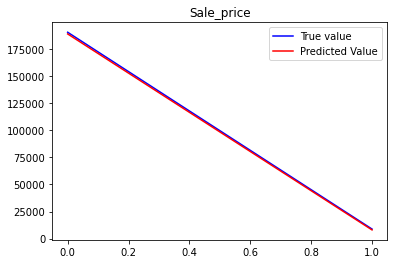

In [46]:
plt.plot(y_valid.values[:][0], color='blue', label='True value')
plt.plot( y_pred[:][0], color='red', label='Predicted Value')
plt.legend()
plt.title('Sale_price')

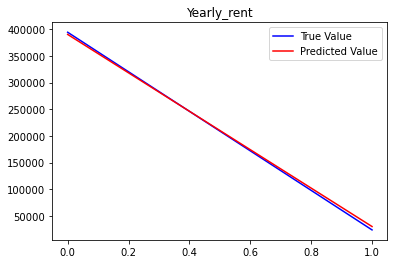

In [47]:
plt.plot(y_valid.values[:][1], color='blue', label='True Value')
plt.plot( y_pred[:][1], color='red', label='Predicted Value')
plt.title('Yearly_rent')
plt.legend()

Text(0.5, 1.0, 'Mean squared Error')

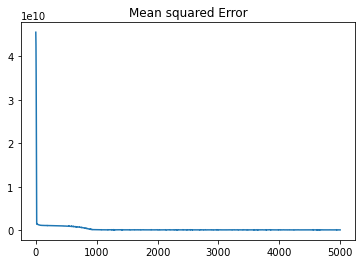

In [51]:
plt.plot(np.arange(5000),history.history['loss'])
plt.title('Mean squared Error')

Text(0.5, 1.0, 'Mean Absolute Error')

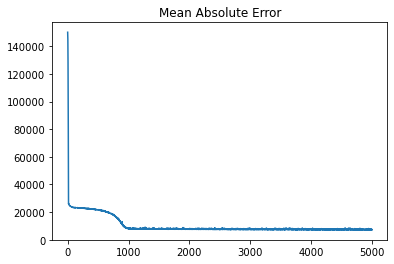

In [52]:
plt.plot(np.arange(5000),history.history['mae'])
plt.title('Mean Absolute Error')